In [2]:
# LAB-04 MACHINE LEARNING : SUPPORT VECTOR MACHINE

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

from sklearn import datasets
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split

from sklearn.preprocessing import StandardScaler

%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [6]:
pylab.rcParams['figure.figsize'] = (10, 6)

iris_data = datasets.load_iris()

X = iris_data.data[:, [2, 3]]
y = iris_data.target

iris_df = pd.DataFrame(iris_data.data[:, [2, 3]], columns = iris_data.feature_names[2:])

iris_df.head()

,petal length (cm),petal width (cm)
0,1.4,0.2
1,1.4,0.2
2,1.3,0.2
3,1.5,0.2
4,1.4,0.2


In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state = 33)

print('The training set contains {} samples and the test set contains {} samples'.format(X_train.shape[0], X_test.shape[0]))

The training set contains 105 samples and the test set contains 45 samples


<ipython-input-8-f84b09f72507>:5: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(x=X[y == cl, 0], y=X[y == cl, 1],


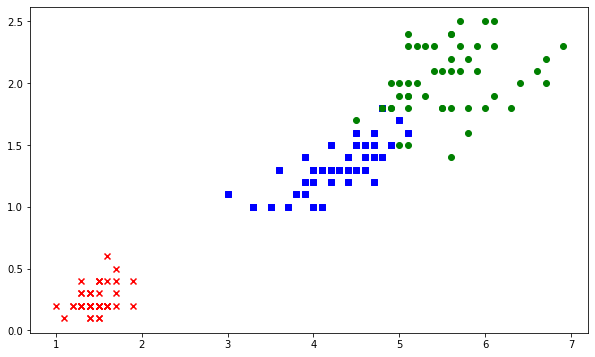

In [8]:
markers = ('x', 's', 'o')
colors = ('red', 'blue', 'green')
cmap = ListedColormap(colors[:len(np.unique(y_test))])
for idx, cl in enumerate(np.unique(y)):
    plt.scatter(x=X[y == cl, 0], y=X[y == cl, 1],
           c=cmap(idx), marker=markers[idx], label=cl)

In [10]:
standard_scaler = StandardScaler()
standard_scaler.fit(X_train)

X_train_standard = standard_scaler.transform(X_train)
X_test_standard = standard_scaler.transform(X_test)

print('The first five rows after standardisation look like this:\n')
print(pd.DataFrame(X_train_standard, columns=iris_df.columns).head())

The first five rows after standardisation look like this:

   petal length (cm)  petal width (cm)
0          -0.342701         -0.041804
1          -1.112992         -1.238932
2           1.528006          1.155323
3          -1.168013         -1.238932
4          -1.168013         -0.972904


In [11]:
SVM = SVC(kernel='rbf', random_state=0, gamma=.10, C=1.0)
SVM.fit(X_train_standard, y_train)

print('Accuracy of our SVM model on the training data is {:.2f} out of 1'.format(SVM.score(X_train_standard, y_train)))

print('Accuracy of our SVM model on the test data is {:.2f} out of 1'.format(SVM.score(X_test_standard, y_test)))

Accuracy of our SVM model on the training data is 0.97 out of 1
Accuracy of our SVM model on the test data is 0.96 out of 1


In [12]:
import warnings

def versiontuple(version):
   return tuple(map(int, (version.split("."))))

def decision_plot(X, y, classifier, test_idx=None, resolution=0.02):

   # setup marker generator and color map
   markers = ('s', 'x', 'o', '^', 'v')
   colors = ('red', 'blue', 'green', 'gray', 'cyan')
   cmap = ListedColormap(colors[:len(np.unique(y))])

   # plot the decision surface
   x1min, x1max = X[:, 0].min() - 1, X[:, 0].max() + 1
   x2min, x2max = X[:, 1].min() - 1, X[:, 1].max() + 1
   xx1, xx2 = np.meshgrid(np.arange(x1min, x1max, resolution),
                 np.arange(x2min, x2max, resolution))
   Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
   Z = Z.reshape(xx1.shape)
   plt.contourf(xx1, xx2, Z, alpha=0.4, cmap=cmap)
   plt.xlim(xx1.min(), xx1.max())
   plt.ylim(xx2.min(), xx2.max())

   for idx, cl in enumerate(np.unique(y)):
      plt.scatter(x=X[y == cl, 0], y=X[y == cl, 1],
              alpha=0.8, c=cmap(idx),
              marker=markers[idx], label=cl)

<ipython-input-12-0ce3ef7a9cee>:25: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(x=X[y == cl, 0], y=X[y == cl, 1],


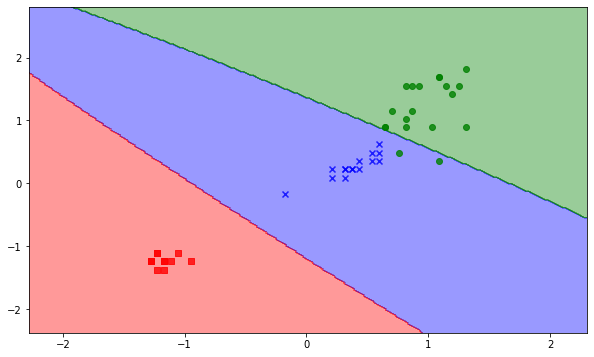

In [13]:
decision_plot(X_test_standard, y_test, SVM)